In [1]:
import json
import matplotlib.pyplot as plt
import os
import numpy as np
import ast
# Function to save the Plots
def save_fig(fig_id,path, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(path, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
# Define the Paths 

# The Path with the Trials
TRIALS_ROOT = "F:/Thesis/2020/TRIALS 2020/"
# The Trial IDs to be compared with each other
IDs = ["ID_104","ID_105","ID_106"]
# The Path to save the Images
IMG_PATH = "F:/Thesis/2020/TRIALS 2020/Comparisons/val_loss and loss/Triplets/"
# The Title under which the Images are saved
comparison_title = "ID_101_vs_102_vs_103"

Saving figure ID_101_vs_102_vs_103_val_loss


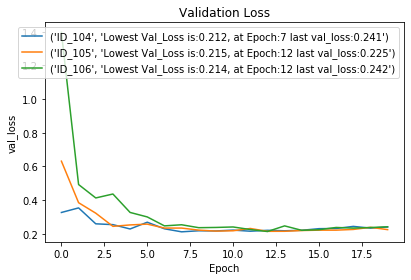

Saving figure ID_101_vs_102_vs_103_loss


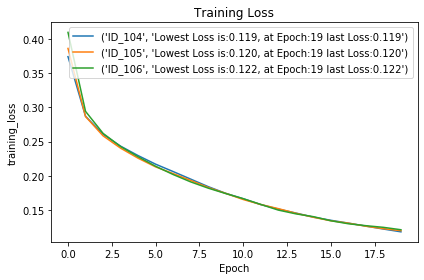

In [6]:
def import_and_draw_history(TRIALS_ROOT,IMG_PATH,IDs,title):
# List of all histories of IDs
    histories = []
# Contains a string for the Legend with the Lowest loss and the Epoch
    lowest_val_loss = []
    lowest_loss = []
# Reads in the histories and turns them into a dictionary
    for ID in IDs:
        HISTORY_PATH = os.path.join(TRIALS_ROOT,ID,str("history_"+ID))
        with open(HISTORY_PATH) as his: 
            history = json.loads(his.read())
# Turn the string dictionary into a dictionary and append it
            history = ast.literal_eval(history)
            histories.append(history)
# Get the Indices (Epochs) of the Losses and their values, to a 3 decimal number 
# and append those as string
            val_loss_index_min = np.argmin(history['val_loss'])
            val_loss_min = min(history['val_loss'])
            val_loss_min = '%.3f' %val_loss_min
            last_val_loss = '%.3f'%history['val_loss'][-1]
            lowest_val_loss.append(str("Lowest Val_Loss is:"+val_loss_min+", at Epoch:"+
                                       str(val_loss_index_min)+" last val_loss:"+
                                  str(last_val_loss)))
            loss_index_min = np.argmin(history['loss'])
            loss_min = min(history['loss'])
            loss_min = '%.3f' %loss_min
            last_loss = '%.3f'%history['loss'][-1]
            lowest_loss.append(str("Lowest Loss is:"+loss_min+", at Epoch:"+
                                       str(loss_index_min)+" last Loss:"+
                                  str(last_loss))) 
# Make the Legend and combine the IDs with the Strings of the lowest losses            
    val_loss_legend = list(zip(IDs,lowest_val_loss))
    loss_legend = list(zip(IDs,lowest_loss))
# Plot and Save
    for history in histories:
        plt.plot(history['val_loss'])
    plt.legend(val_loss_legend, loc='upper right')
    plt.title('Validation Loss')
    plt.ylabel('val_loss')
    plt.xlabel('Epoch')
    save_fig(title+"_val_loss",IMG_PATH)
    img_ = plt.show()
    
    for history in histories:
        plt.plot(history['loss'])
    plt.legend(loss_legend, loc='upper right')
    plt.title('Training Loss')
    plt.ylabel('training_loss')
    plt.xlabel('Epoch')
    save_fig(title+"_loss",IMG_PATH)
    img_ = plt.show()
    return histories





histories = import_and_draw_history(TRIALS_ROOT,IMG_PATH,IDs,comparison_title)




ID_119_vs_ID_120_vs_ID_121
Saving figure ID_119_vs_ID_120_vs_ID_121_val_loss


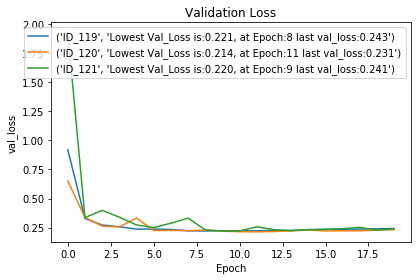

Saving figure ID_119_vs_ID_120_vs_ID_121_loss


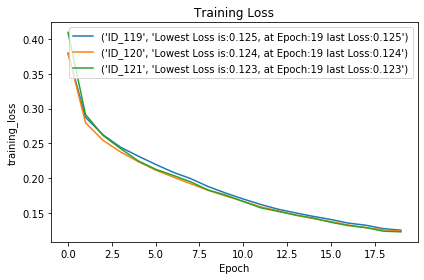

In [7]:
a= []
for i in range(18,21,3):
    IDs = [str("ID_"+str(i+101)),str("ID_"+str(i+102)),str("ID_"+str(i+103))]
    comparison_title = IDs[0]+"_vs_"+IDs[1]+"_vs_"+IDs[2]

    print(comparison_title)
    histories = import_and_draw_history(TRIALS_ROOT,IMG_PATH,IDs,comparison_title)